<a href="https://colab.research.google.com/github/MrLeanage/happy_pet_image_classification/blob/main/src/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mounting Drive
from google.colab import drive
drive.mount('/content/drive')

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

#setting GPU configs
#config = ConfigProto()
#config.gpu_options.per_process_gpu_memory_fraction = 0.5
#config.gpu_options.allow_growth = True
#session = InteractiveSession(config=config)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:


# Convolutional Neural Network

# defining constants
SPLIT_SIZE = .7

# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore')

import os
import random
from shutil import copyfile

tf.__version__



'2.8.2'

In [ ]:
#importing data from drive to project
original_dataset_dir = '/content/drive/MyDrive/Colab Notebooks/happy_pet/implementations/image_processing/data'
data_dir_list = os.listdir(original_dataset_dir)
print(data_dir_list)
path, dirs, files = next(os.walk(original_dataset_dir))
file_count = len(data_dir_list)
print(file_count)

['Papule', 'Ringworm', 'Seborrhea', 'Alopecia', 'Vesicle', 'Pemphigus', 'Melanoma', 'Dranduff', 'Yeast_infection', 'Comedones_blackheads', 'Furunculosis', 'Impetigo', 'Fleas', 'Folliculitis', 'Hypothyvoidis', 'Lupus', 'Mange']
17


In [ ]:
#make new base directories to split data for Test and Train
base_dir = '/content/image_data'
if not os.path.exists(base_dir):
  os.mkdir(base_dir)

In [ ]:
#creating folders for Train and Test Data
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
  os.mkdir(train_dir)

test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
 os.mkdir(test_dir)

In [ ]:
#creating other class folders in Test and Train data folders
# ['Mange', 'Lupus', 'Impetigo', 'Hypothyvoidis', 'Furunculosis', 'Folliculitis', 'Fleas', 'Dranduff', 'Comedones_blackheads', 'Alopecia', 'Yeast_infection', 'Vesicle', 'Seborrhea', 'Ringworm', 'Pemphigus', 'Papule', 'Melanoma']

#folders for Train
for disease_folder in data_dir_list :
  if not os.path.exists(train_dir + '/' + disease_folder):
    os.mkdir(os.path.join(train_dir, disease_folder))
  

#folders for Test
for disease_folder in data_dir_list :
  if not os.path.exists(test_dir + '/' + disease_folder):
    os.mkdir(os.path.join(test_dir, disease_folder))

In [ ]:
#Split data for Training and Testing

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  files = []
  for filename in os.listdir(SOURCE):
    file = SOURCE + filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print(filename + ' is empty, So ignoring!..')

  training_length = int(len(files) * SPLIT_SIZE)
  valid_length = int(len(files) - training_length)

  shuffled_set = random.sample(files, len(files))
  training_set = shuffled_set[0:training_length]
  testing_set = shuffled_set[training_length:]

  for filename in training_set:
      this_file = SOURCE + filename
      destination = TRAINING + filename
      #calling filter for images
      copyfile(this_file, destination)

  for filename in testing_set:
      this_file = SOURCE + filename
      destination = TESTING + filename
      #calling filter for images
      copyfile(this_file, destination)

In [ ]:
#copying data for Training and testing folders
for disease_folder in data_dir_list :
  split_data(original_dataset_dir + '/' + disease_folder + '/', train_dir + '/' + disease_folder + '/', test_dir + '/' + disease_folder + '/', SPLIT_SIZE)

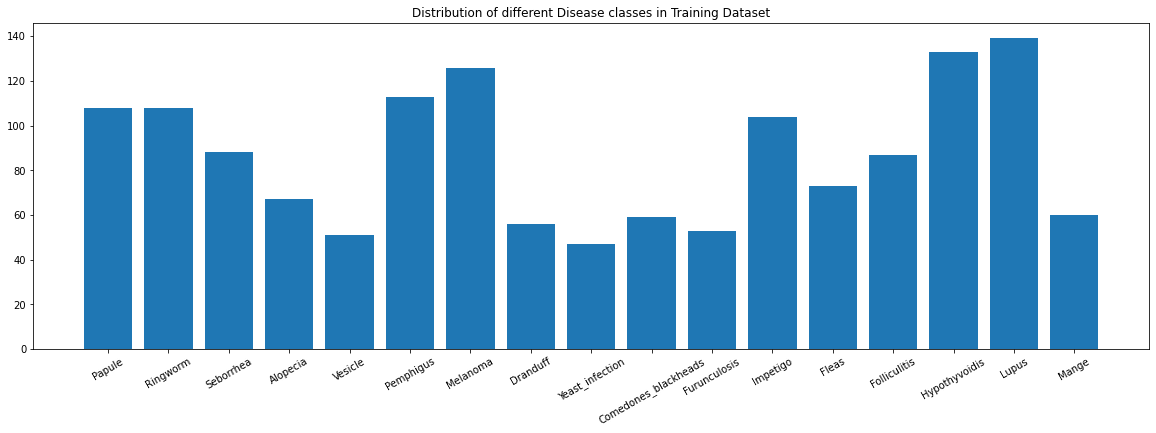

In [ ]:
#displaying the distribution of training data set
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

nimgs = {}
for i in data_dir_list:
    nimages = len(os.listdir(train_dir + '/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(20, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different Disease classes in Training Dataset')
plt.xticks(rotation=30)
plt.show()

In [ ]:
for i in data_dir_list:
    print('Training {} images are: '.format(i)+str(len(os.listdir(train_dir +'/'+i+'/'))))

Training Papule images are: 108
Training Ringworm images are: 108
Training Seborrhea images are: 88
Training Alopecia images are: 67
Training Vesicle images are: 51
Training Pemphigus images are: 113
Training Melanoma images are: 126
Training Dranduff images are: 56
Training Yeast_infection images are: 47
Training Comedones_blackheads images are: 59
Training Furunculosis images are: 53
Training Impetigo images are: 104
Training Fleas images are: 73
Training Folliculitis images are: 87
Training Hypothyvoidis images are: 133
Training Lupus images are: 139
Training Mange images are: 60


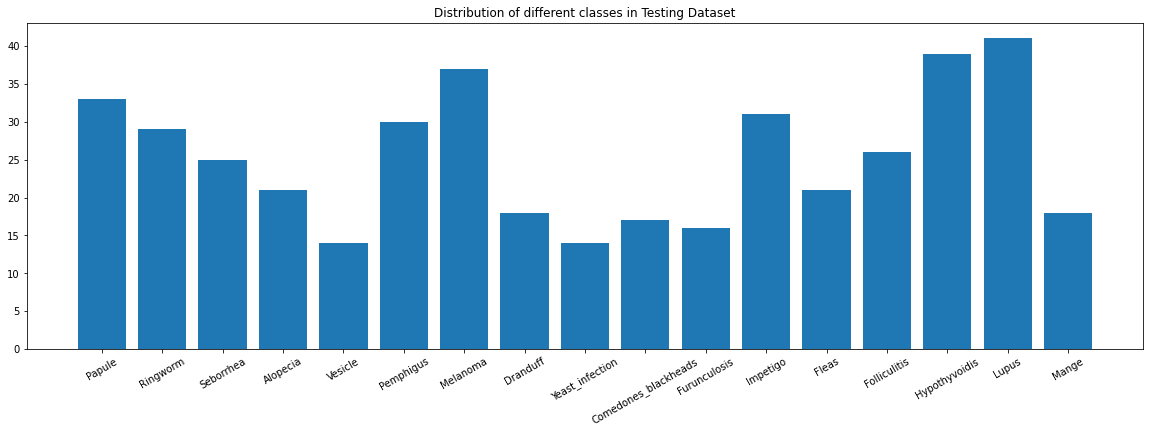

In [ ]:
#displaying the distribution of testing data set
nimgs = {}
for i in data_dir_list:
    nimages = len(os.listdir(test_dir + '/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(20, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Testing Dataset')
plt.xticks(rotation=30)
plt.show()



In [ ]:
for i in data_dir_list:
    print('Testing {} images are: '.format(i)+str(len(os.listdir(test_dir +'/'+i+'/'))))

Testing Papule images are: 33
Testing Ringworm images are: 29
Testing Seborrhea images are: 25
Testing Alopecia images are: 21
Testing Vesicle images are: 14
Testing Pemphigus images are: 30
Testing Melanoma images are: 37
Testing Dranduff images are: 18
Testing Yeast_infection images are: 14
Testing Comedones_blackheads images are: 17
Testing Furunculosis images are: 16
Testing Impetigo images are: 31
Testing Fleas images are: 21
Testing Folliculitis images are: 26
Testing Hypothyvoidis images are: 39
Testing Lupus images are: 41
Testing Mange images are: 18


IMAGE FILTERING

ALGORITHM TESTING CODE BLOCK 1 - SVM CLASSIFICATION

In [ ]:


# Part 1 - Data Preprocessing

# Preprocessing the Training set, rescale & augment data
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1471 images belonging to 17 classes.


In [ ]:
# Preprocessing the Test set 
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 430 images belonging to 17 classes.


In [ ]:
#importing layers libraries
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

#
from tensorflow.keras.regularizers import l2

In [ ]:
#creating CNN Layer
# Part 2 - Building the CNN (Convolution+Pool)
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


## for mulitclassification
cnn.add(Dense(17, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='softmax'))
# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])




In [ ]:
cnn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 2048)              0         
                                                                 
 dense_19 (Dense)            (None, 128)              

In [ ]:


# Part 3 - Training the CNN

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 50)



Epoch 1/50
46/46 [==============================] - 28s 603ms/step - loss: 1.0815 - accuracy: 0.3379 - val_loss: 1.0796 - val_accuracy: 0.3465
Epoch 2/50
46/46 [==============================] - 27s 597ms/step - loss: 1.0748 - accuracy: 0.3732 - val_loss: 1.0753 - val_accuracy: 0.3907
Epoch 3/50
46/46 [==============================] - 27s 592ms/step - loss: 1.0765 - accuracy: 0.3671 - val_loss: 1.0733 - val_accuracy: 0.3860
Epoch 4/50
46/46 [==============================] - 27s 587ms/step - loss: 1.0724 - accuracy: 0.3895 - val_loss: 1.0644 - val_accuracy: 0.4442
Epoch 5/50
46/46 [==============================] - 27s 585ms/step - loss: 1.0699 - accuracy: 0.4086 - val_loss: 1.0627 - val_accuracy: 0.4419
Epoch 6/50
46/46 [==============================] - 27s 591ms/step - loss: 1.0663 - accuracy: 0.4269 - val_loss: 1.0626 - val_accuracy: 0.4442
Epoch 7/50
46/46 [==============================] - 27s 578ms/step - loss: 1.0639 - accuracy: 0.4487 - val_loss: 1.0664 - val_accuracy: 0.4279

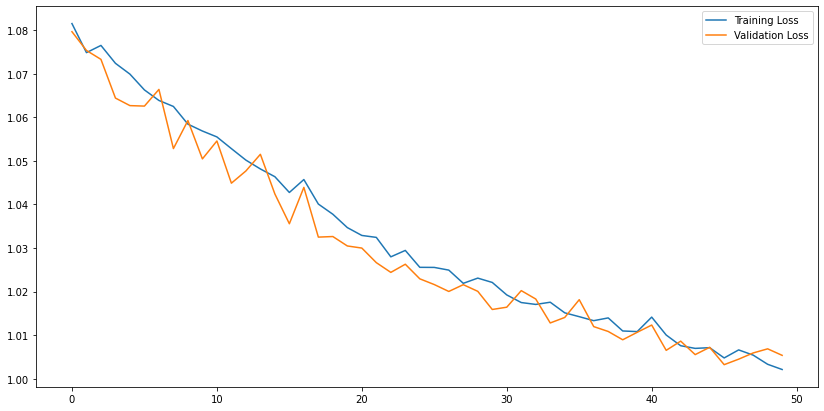

<Figure size 432x288 with 0 Axes>

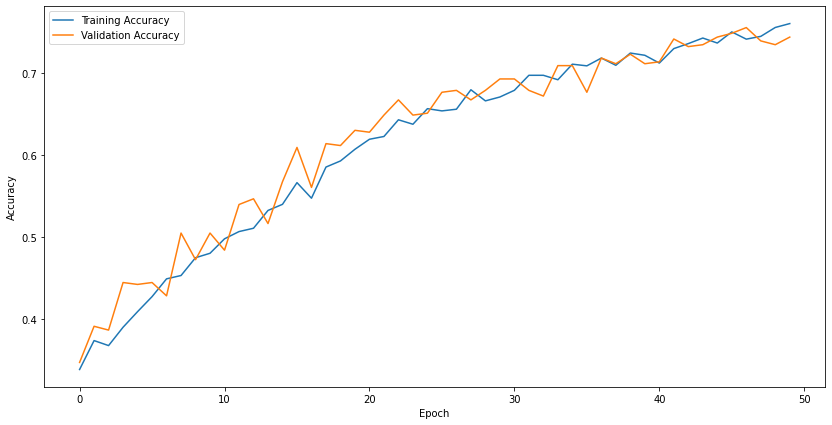

<Figure size 432x288 with 0 Axes>

In [ ]:
#plotting accuracy over training and validation accuracy

# plot the loss
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14,7))
plt.plot(r.history['loss'], label='Training Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
fig = plt.figure(figsize=(14,7))
plt.plot(r.history['accuracy'], label='Training Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')



In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model
model_path = '/content/drive/MyDrive/Colab Notebooks/happy_pet/implementations/image_processing/model/'
model_file_name = 'model_r_skin_disease.h5'
cnn.save(model_path + model_file_name)


In [ ]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model(model_path + model_file_name)


In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 2048)              0         
                                                                 
 dense_19 (Dense)            (None, 128)              

In [ ]:


# Part 4 - Making a single prediction
test_diseased_image = '/Alopecia/A11_1.jpg'

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img(test_dir + test_diseased_image, target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)



In [ ]:
print(result)
print(data_dir_list)

[[7.1010870e-01 2.7122283e-06 2.6851296e-01 3.1281048e-05 3.0639840e-03
  6.2439558e-03 1.0172274e-03 4.2953907e-10 7.7150473e-03 3.2586141e-03
  4.3511395e-07 3.0766168e-05 1.4653101e-06 4.0202317e-06 8.4893154e-06
  2.5624857e-07 1.0184042e-07]]
['Papule', 'Ringworm', 'Seborrhea', 'Alopecia', 'Vesicle', 'Pemphigus', 'Melanoma', 'Dranduff', 'Yeast_infection', 'Comedones_blackheads', 'Furunculosis', 'Impetigo', 'Fleas', 'Folliculitis', 'Hypothyvoidis', 'Lupus', 'Mange']


Test Performance on Data Set

In [ ]:
## Test Performance on Test Data
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [ ]:


# Read Test Images Dir and their labels
test_images_dir = '/content/dataset/alien_test/'
test_df = pd.read_csv('/content/dataset/test.csv')

# put them in a list
test_dfToList = test_df['Image_id'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/test_preproc_CNN.npy', test_preprocessed_images)



In [ ]:
array = model.predict(test_preprocessed_images, batch_size=1, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

In [ ]:
test_df = pd.read_csv('/content/dataset/test.csv')
y_true = test_df['labels']
y_pred = array
print(y_true)

In [ ]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

In [ ]:


from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

classes = os.listdir(train_dir)


In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:


np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, without normalization')
plt.show()

